# 1. Preliminary

## 1.1 Context

blabla

## 1.2 Requirements

* pandas
* numpy


* scikit-learn


* matplotlib

## 1.3 Imports

In [62]:
# builtin 
import os


# data
import pandas as pd
import numpy as np


# preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# visualisation
import matplotlib.pyplot as plt


## 1.4 Data

In [63]:
os.getcwd()

'/home/alex/Desktop/ocr-tp-lineaire'

In [64]:
os.listdir()

['.vscode',
 'env',
 '00_tp.ipynb',
 'requirements.txt',
 'data',
 '.ipynb_checkpoints',
 'img']

In [65]:
os.listdir("img")

['tree.jpg']

<img src="img/tree.png"
     alt="img/tree.png" />

In [66]:
# !tree

("./img/tree.png")

'./img/tree.png'

In [67]:
# écrivons 2 varibales pour retrouver nos fichiers

path = "./data/source/"           # mettez votre chemin de fichier
filename = "TP_2_datset_mushrooms.csv"   # mettez le nom de votre fichier .csv

In [68]:
# chargeons nos données
df = pd.read_csv(path + filename)

In [69]:
# verifions que le chargment c'est bien effectué

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. First Tour

## 2.1 Display

In [70]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [72]:
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5309,e,f,y,e,t,n,f,c,b,e,...,s,w,w,p,w,t,e,w,c,w
682,e,x,f,y,t,a,f,w,n,w,...,s,w,w,p,w,o,p,u,v,d
4635,p,x,y,y,f,f,f,c,b,p,...,k,b,p,p,w,o,l,h,y,d
2757,e,x,y,n,t,n,f,c,b,n,...,s,w,p,p,w,o,p,n,v,d
7715,p,f,s,n,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
1015,e,f,f,y,t,a,f,w,n,p,...,s,w,w,p,w,o,p,u,v,d
3218,p,x,s,g,f,c,f,w,n,g,...,s,w,w,p,w,o,p,k,v,d
5332,p,k,y,y,f,n,f,c,n,w,...,y,w,n,p,w,o,e,w,v,d
7713,p,x,s,e,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l
2749,p,x,f,g,f,c,f,c,n,p,...,s,w,w,p,w,o,p,k,v,d


## 2.2 Structure

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [74]:
df.dtypes.value_counts()

object    23
dtype: int64

In [75]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## 2.3 Nan & Duplicated

In [76]:
df.isna().mean()

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [77]:
df.duplicated().sum()

0

## 2.4 Data inspection

In [78]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [79]:
df.iloc[:, 0].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [80]:
df.iloc[:, 0].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

<AxesSubplot:ylabel='class'>

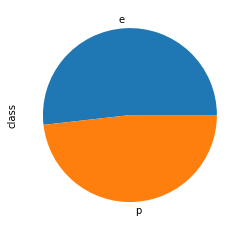

In [81]:
df.iloc[:, 0].value_counts().plot(kind="pie")

# 3. Cleaning

## 3.1 Label encoding 

In [82]:
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [83]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [85]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## 3.2 Rename "class" in target

In [86]:
df = df.rename(columns={"class": "target" })
df

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


# 4. Modelisation

## 4.1 Data preparation

In [87]:
# On récupère les features d'un côté...
X = df.drop(columns="target")

# et les labels de l'autre
y = df.target

In [88]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [89]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [90]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
# validons la forme de nos données

print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme  {y_train.shape}  ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme  {y_test.shape}  ")

Nous avons X_train de forme (5686, 22) et y_train de forme  (5686,)  
Nous avons X_test de forme (2438, 22) et y_test de forme  (2438,)  


## 4.2 Dummy Classifier

In [92]:
estimator = DummyClassifier()
estimator.fit(X_train, y_train)

DummyClassifier()

In [93]:
estimator.score(X_train, y_train).round(2)

0.51

In [94]:
estimator.score(X_test, y_test).round(2)

0.53

In [95]:
y_pred = estimator.predict(X_test)
y_test

4990    1
5515    0
6223    1
585     0
6595    1
       ..
43      1
1005    0
4712    1
6361    1
3829    1
Name: target, Length: 2438, dtype: int64

In [96]:
y_test.value_counts()

0    1288
1    1150
Name: target, dtype: int64

In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.5


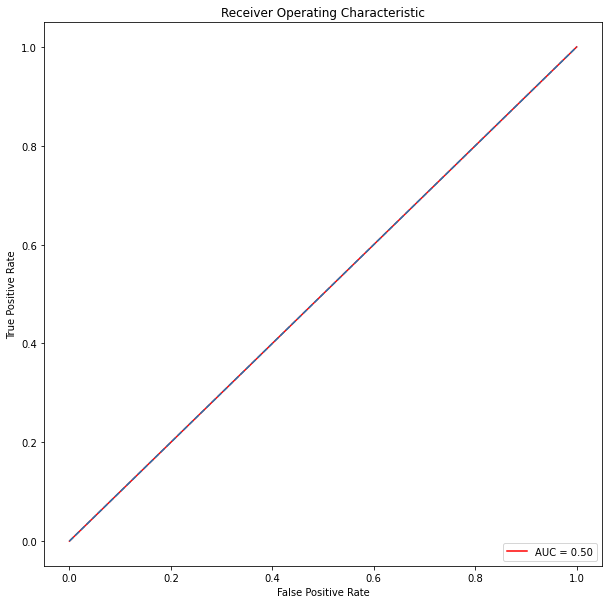

In [98]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
mat = confusion_matrix(y_test, y_pred)

In [100]:
pd.DataFrame(mat)

,0,1
0,1288,0
1,1150,0


## 4.2 Logistic regression

### 4.2.1  Without GridSearch

In [101]:
# Entrainons la Regression Logistique

lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [102]:
# On récupère la prédiction de la valeur positive
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [103]:
# on peut accéder directement aux probalités de la classe 0 ou 1 de cette façon

y_prob = lr.predict_proba(X_test).round(2)
y_prob

array([[0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.01, 0.99],
       [0.08, 0.92],
       [0.11, 0.89]])

In [104]:
lr.score(X_train, y_train).round(2)

0.95

In [105]:
lr.score(X_test, y_test).round(2)

0.95

In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9536335403726708


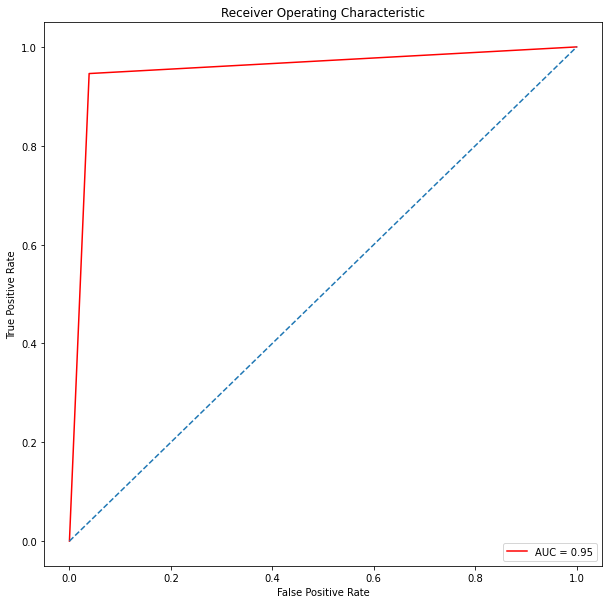

In [107]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
mat = confusion_matrix(y_test, y_pred)
pd.DataFrame(mat)

,0,1
0,1238,50
1,62,1088


## 4.2.2 Using Grid Search

In [109]:
estimator = LogisticRegression(solver = 'liblinear')
params = {  'C': np.logspace(-3, 3, 7) , 
            'penalty':['l1','l2'] }

In [110]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=3)

In [111]:
print(grid.best_params_)

{'C': 100.0, 'penalty': 'l1'}


In [112]:
res = grid.cv_results_
res

{'mean_fit_time': array([ 0.02182822,  0.06532664,  0.08032999,  0.06630964,  0.30560594,
         0.11685629,  5.88357306,  0.12899647, 13.3897356 ,  0.24157982,
        13.63709092,  0.32709498, 12.99143796,  0.35376735]),
 'std_fit_time': array([8.71590324e-04, 2.67534418e-02, 1.35912720e-02, 2.02641040e-02,
        5.48487347e-02, 2.00584130e-02, 2.41648420e+00, 3.15375023e-02,
        3.04074740e+00, 3.80748345e-02, 2.22930169e+00, 5.09617859e-02,
        3.64340443e+00, 3.29008934e-02]),
 'mean_score_time': array([0.00321255, 0.00494962, 0.00332479, 0.0032023 , 0.00397334,
        0.00666671, 0.00416036, 0.00335608, 0.00328012, 0.00664897,
        0.00397601, 0.00585713, 0.00406008, 0.0050477 ]),
 'std_score_time': array([0.00038351, 0.00261297, 0.00047385, 0.00047552, 0.00159938,
        0.00643387, 0.00115649, 0.00036154, 0.00040149, 0.00664254,
        0.00126282, 0.00357478, 0.00111076, 0.00016491]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0,

In [113]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021828,0.000872,0.003213,0.000384,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.767135,0.772208,0.765172,...,0.773128,0.007175,14,0.774626,0.773357,0.775115,0.772477,0.770059,0.773127,0.001794
1,0.065327,0.026753,0.004950,0.002613,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.874341,0.861038,0.865435,...,0.865633,0.006782,13,0.863676,0.867224,0.867663,0.866784,0.868323,0.866734,0.001611
2,0.080330,0.013591,0.003325,0.000474,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.897188,0.885664,0.897977,...,0.896236,0.007191,12,0.893360,0.898879,0.902396,0.897560,0.895801,0.897599,0.003028
3,0.066310,0.020264,0.003202,0.000476,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.905975,0.900616,0.905893,...,0.908020,0.005375,11,0.908311,0.911409,0.910530,0.906793,0.907232,0.908855,0.001817
4,0.305606,0.054849,0.003973,0.001599,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.942882,0.942832,0.939314,...,0.943370,0.002461,9,0.942832,0.945263,0.945702,0.942625,0.943944,0.944073,0.001243
5,0.116856,0.020058,0.006667,0.006434,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.929701,0.936675,0.934037,...,0.934401,0.002563,10,0.931838,0.937349,0.938888,0.935370,0.934271,0.935543,0.002442
6,5.883573,2.416484,0.004160,0.001156,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.957821,0.963061,0.951627,...,0.961133,0.005760,6,0.962181,0.968784,0.957133,0.967905,0.960871,0.963375,0.004392
7,0.128996,0.031538,0.003356,0.000362,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.949033,0.948989,0.943712,...,0.949349,0.003917,8,0.948549,0.949000,0.950758,0.949220,0.948560,0.949217,0.000813
8,13.389736,3.040747,0.003280,0.000401,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.963093,0.972735,0.963061,...,0.970807,0.006607,4,0.970097,0.977577,0.967465,0.977138,0.970323,0.972520,0.004078
9,0.241580,0.038075,0.006649,0.006643,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.955185,0.961302,0.952507,...,0.959726,0.005073,7,0.960202,0.967246,0.956694,0.967026,0.959112,0.962056,0.004301


In [114]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [115]:
res = res[cols]
res = res.sort_values("rank_test_score")
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
10,13.637091,2.229302,0.003976,0.001263,100.0,l1,"{'C': 100.0, 'penalty': 'l1'}",0.971862,0.006940,1,0.972740,0.004148
12,12.991438,3.643404,0.004060,0.001111,1000.0,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.971686,0.006905,2,0.972696,0.004022
13,0.353767,0.032901,0.005048,0.000165,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.971686,0.006905,2,0.973048,0.004171
8,13.389736,3.040747,0.003280,0.000401,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.970807,0.006607,4,0.972520,0.004078
11,0.327095,0.050962,0.005857,0.003575,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.970455,0.007107,5,0.972168,0.004122
6,5.883573,2.416484,0.004160,0.001156,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.961133,0.005760,6,0.963375,0.004392
9,0.241580,0.038075,0.006649,0.006643,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.959726,0.005073,7,0.962056,0.004301
7,0.128996,0.031538,0.003356,0.000362,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.949349,0.003917,8,0.949217,0.000813
4,0.305606,0.054849,0.003973,0.001599,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.943370,0.002461,9,0.944073,0.001243
5,0.116856,0.020058,0.006667,0.006434,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.934401,0.002563,10,0.935543,0.002442


In [116]:
estimator = LogisticRegression(solver = 'liblinear', penalty="l2", C=1000)
estimator.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [117]:
estimator.score(X_train, y_train).round(2)

0.97

In [118]:
estimator.score(X_test, y_test).round(2)

0.97

In [119]:
2/5

0.4